# CAT Plot generation : Parametric DMDs

## Alexandra Semposki

### Last edited: 23 October 2024

In this notebook, we generate a Computational Accuracy vs. Time (CAT) plot to compare the speed and accuracy of our high-fidelity (HF) solver to the results we get using the parametric Dynamic Mode Decomposition (DMD) method. The CAT plot here is generated from the quarkyonic EOS model.

In [31]:
# import packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline, PchipInterpolator

# setting some parameters for pretty plots
fontsize = 9
mpl.rcdefaults()
mpl.rc('text', usetex=True)
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'

mpl.rcParams['axes.labelsize'] = fontsize
mpl.rcParams['axes.edgecolor'] = 'k'
mpl.rcParams['axes.labelcolor'] = 'k'
mpl.rcParams['axes.titlesize'] = fontsize

mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize
mpl.rcParams['xtick.color'] = 'k'
mpl.rcParams['ytick.color'] = 'k'

# thin ticks
mpl.rcParams['xtick.major.width'] = mpl.rcParams['axes.linewidth'] * 0.95
mpl.rcParams['ytick.major.width'] = mpl.rcParams['axes.linewidth'] * 0.95

# minor ticks bigger
mpl.rcParams['xtick.minor.size'] = 2.4  # Default 2.0
mpl.rcParams['ytick.minor.size'] = 2.4
mpl.rcParams['xtick.major.size'] = 3.9  # Default 3.5
mpl.rcParams['ytick.major.size'] = 3.9

ppi = 72
mpl.rcParams['figure.titlesize'] = fontsize
mpl.rcParams['figure.dpi'] = 150  # default, able to change in each plot
mpl.rcParams['figure.constrained_layout.use'] = True

# 0.02 and 3 points are the defaults:
# can be changed on a plot-by-plot basis using fig.set_constrained_layout_pads()
mpl.rcParams['figure.constrained_layout.wspace'] = 0.0
mpl.rcParams['figure.constrained_layout.hspace'] = 0.0
mpl.rcParams['figure.constrained_layout.h_pad'] = 3. / ppi  # 3 points
mpl.rcParams['figure.constrained_layout.w_pad'] = 3. / ppi

mpl.rcParams['legend.title_fontsize'] = fontsize
mpl.rcParams['legend.fontsize'] = fontsize
mpl.rcParams['legend.edgecolor'] = 'inherit'  # inherits from axes.edgecolor, to match
mpl.rcParams['legend.facecolor'] = (1, 1, 1, 0.6)  # set facecolor with its own alpha, so edgecolor is unaffected
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderaxespad'] = 0.8
mpl.rcParams['legend.framealpha'] = None  # do not set overall alpha (affects edgecolor). Handled by facecolor above
mpl.rcParams['patch.linewidth'] = 0.8  # this is for legend edgewidth, since it does not have its own option

mpl.rcParams['hatch.linewidth'] = 0.5

In [32]:
def the_good_interpolator(x_tov, y_tov, x_dmd):
    # Create a normalized parameter t that corresponds to the original x values
    t_original = np.linspace(0, 1, num=len(x_tov))
    
    # Create cubic splines for original x and y
    cs_x = CubicSpline(t_original, x_tov, bc_type='natural')
    cs_y = CubicSpline(t_original, y_tov, bc_type='natural')
    
    # Create a new parameter t for the new x-values
    t_new = np.linspace(0, 1, num=len(x_dmd))
    
    # Interpolate to find the corresponding y-values for the new x-values
    y_new = cs_y(t_new)
    
    return x_dmd, y_new

In [33]:
!ls ../TOV_data

MR_Quarkyonia_370.00_0.10.dat MR_Quarkyonia_374.74_0.30.dat
MR_Quarkyonia_370.00_0.12.dat MR_Quarkyonia_375.00_0.10.dat
MR_Quarkyonia_370.00_0.14.dat MR_Quarkyonia_375.00_0.12.dat
MR_Quarkyonia_370.00_0.17.dat MR_Quarkyonia_375.00_0.14.dat
MR_Quarkyonia_370.00_0.19.dat MR_Quarkyonia_375.00_0.17.dat
MR_Quarkyonia_370.00_0.21.dat MR_Quarkyonia_375.00_0.19.dat
MR_Quarkyonia_370.00_0.23.dat MR_Quarkyonia_375.00_0.21.dat
MR_Quarkyonia_370.00_0.26.dat MR_Quarkyonia_375.00_0.23.dat
MR_Quarkyonia_370.00_0.28.dat MR_Quarkyonia_375.00_0.26.dat
MR_Quarkyonia_370.00_0.30.dat MR_Quarkyonia_375.00_0.28.dat
MR_Quarkyonia_370.38_0.10.dat MR_Quarkyonia_375.00_0.30.dat
MR_Quarkyonia_370.38_0.12.dat MR_Quarkyonia_375.38_0.10.dat
MR_Quarkyonia_370.38_0.14.dat MR_Quarkyonia_375.38_0.12.dat
MR_Quarkyonia_370.38_0.17.dat MR_Quarkyonia_375.38_0.14.dat
MR_Quarkyonia_370.38_0.19.dat MR_Quarkyonia_375.38_0.17.dat
MR_Quarkyonia_370.38_0.21.dat MR_Quarkyonia_375.38_0.19.dat
MR_Quarkyonia_370.38_0.23.dat MR_Quarkyo

In [34]:
import os

file_list = []
for file in os.listdir('./../TOV_data/'):
    file_list.append(file)

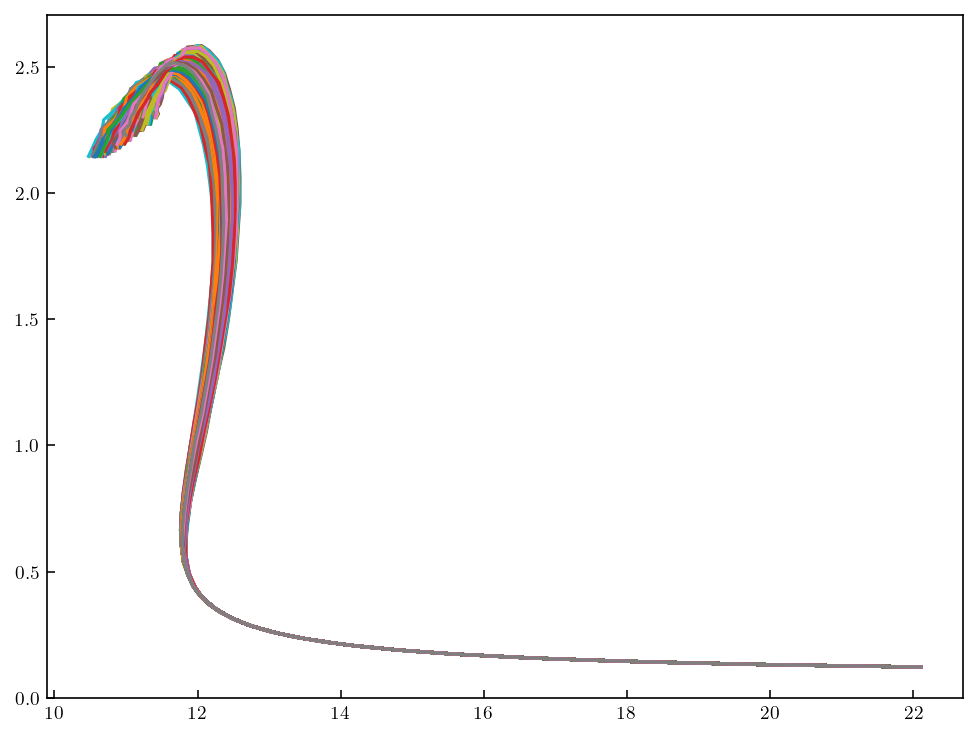

In [35]:
tov_array = []
for file in file_list:
    tov_array.append(np.loadtxt(f'./../TOV_data/{file}'))
tov_array = np.array(tov_array)
tov_array = np.transpose(tov_array, (0, 2, 1))  # omg is the transpose what fixes this??!

plt.plot(tov_array[:, 0, :].T, tov_array[:, 2, :].T)
plt.show()

In [36]:
!ls ../testData

MR_Quarkyonia_370.00_0.17.dat  MRpredict_Data_370.77_0.26.png
MR_Quarkyonia_370.77_0.26.dat  MRpredict_Data_370.79_0.26.png
MR_Quarkyonia_370.79_0.26.dat  MRpredict_Data_371.54_0.17.png
MR_Quarkyonia_371.54_0.17.dat  MRpredict_Data_371.54_0.21.png
MR_Quarkyonia_371.54_0.21.dat  MRpredict_Data_371.54_0.28.png
MR_Quarkyonia_371.54_0.28.dat  MRpredict_Data_371.67_0.28.png
MR_Quarkyonia_371.67_0.28.dat  MRpredict_Data_372.69_0.19.png
MR_Quarkyonia_372.69_0.19.dat  MRpredict_Data_373.46_0.26.png
MR_Quarkyonia_373.46_0.26.dat  MRpredict_Data_373.85_0.19.png
MR_Quarkyonia_373.85_0.19.dat  MRpredict_Data_374.74_0.12.png
MR_Quarkyonia_374.74_0.12.dat  MRpredict_Data_375.38_0.12.png
MR_Quarkyonia_375.38_0.12.dat  MRpredict_Data_375.53_0.19.png
MR_Quarkyonia_375.53_0.19.dat  MRpredict_Data_375.53_0.30.png
MR_Quarkyonia_375.53_0.30.dat  MRpredict_Data_376.15_0.19.png
MR_Quarkyonia_376.15_0.19.dat  MRpredict_Data_376.92_0.12.png
MR_Quarkyonia_376.92_0.12.dat  MRpredict_Data_377.89_0.23.png
MR_Quark

In [37]:
# getting the results from the emulator
emulator_file_list = []
for file in os.listdir('./../testData'):
    emulator_file_list.append(file)

print(len(emulator_file_list))


41


In [38]:
# parsing results into an array
dmd_array = []
for file in emulator_file_list:
    if file[-3:] == 'dat':
        dmd_array.append(np.loadtxt(f'./../testData/{file}'))
dmd_array = np.array(dmd_array)
dmd_array = np.transpose(dmd_array, (0, 2, 1))  # omg is the transpose what fixes this??! # wtf
print(dmd_array.shape)

(20, 3, 50)


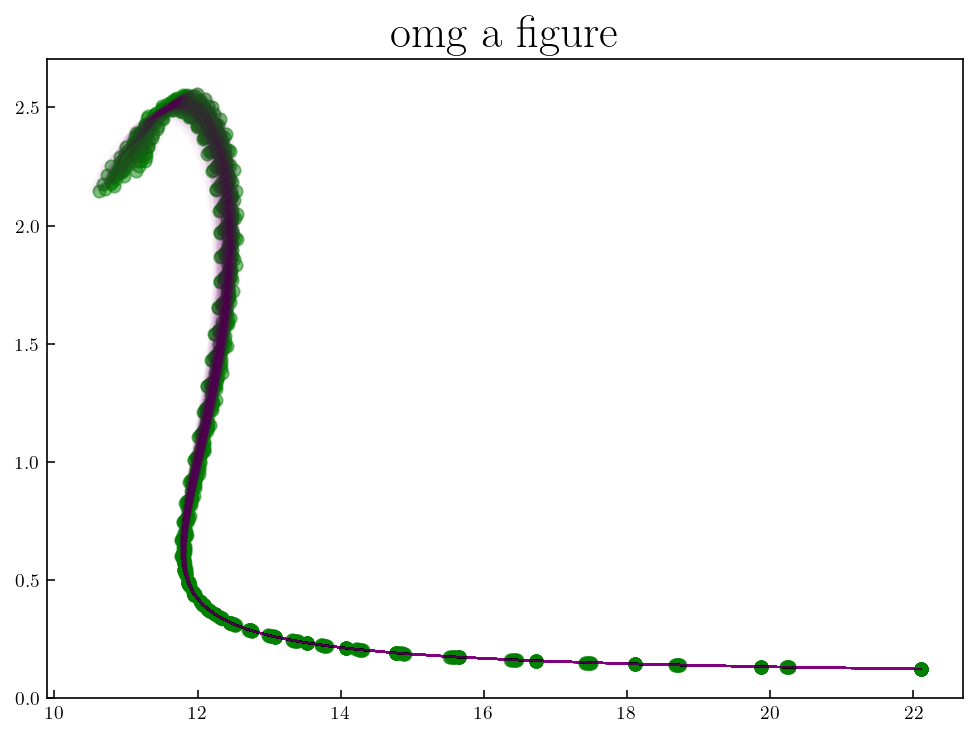

In [39]:
plt.title('omg a figure', fontsize=22)

plt.scatter(dmd_array[:, 0, :].T, dmd_array[:, 2, :].T, color='green', alpha=0.5, label='dmd')
plt.plot(tov_array[:, 0, :].T, tov_array[:, 2, :].T, color='purple', linewidth=1, alpha=0.02, label='tov')

# plt.legend()
plt.show()

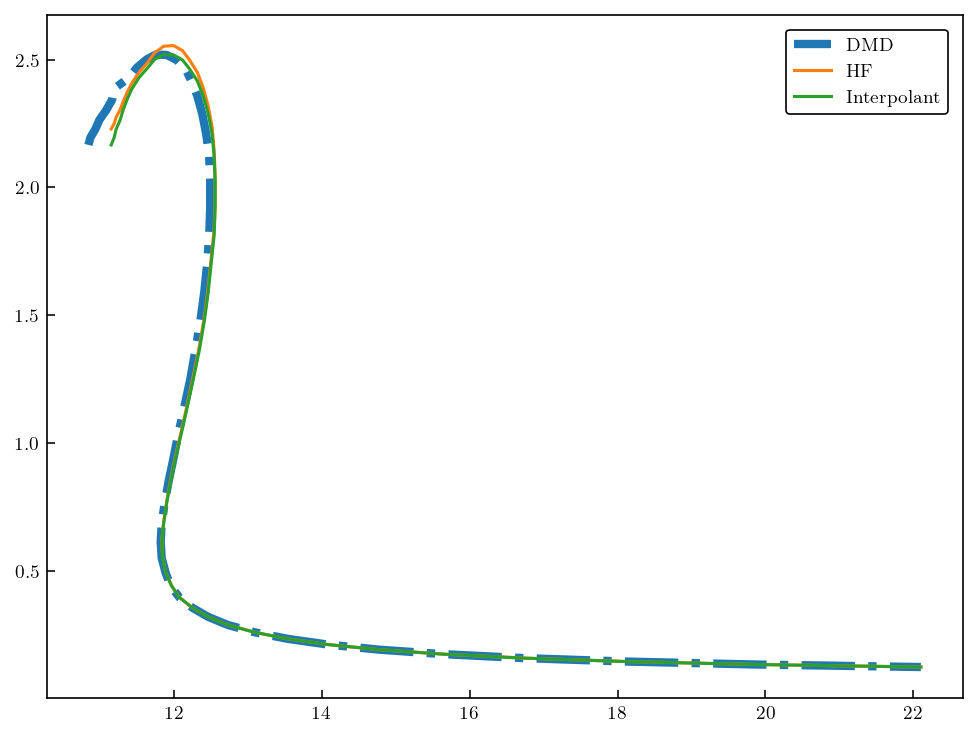

2.519903788400636 2.519903788400636


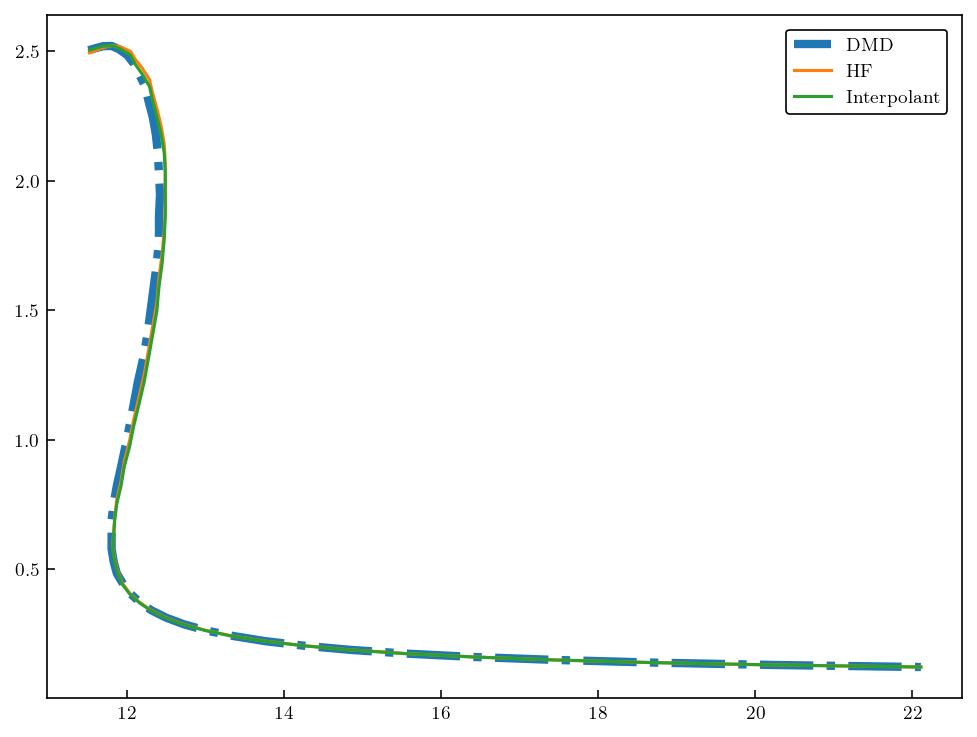

2.520318865981301 2.520318865981301


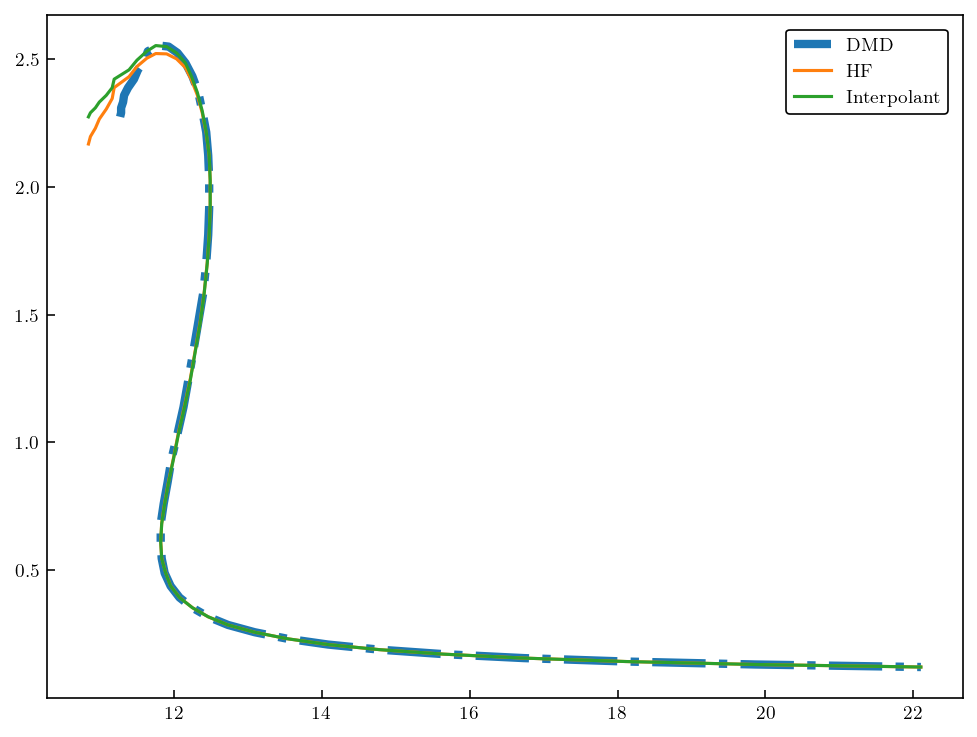

2.551044374937199 2.551044374937199


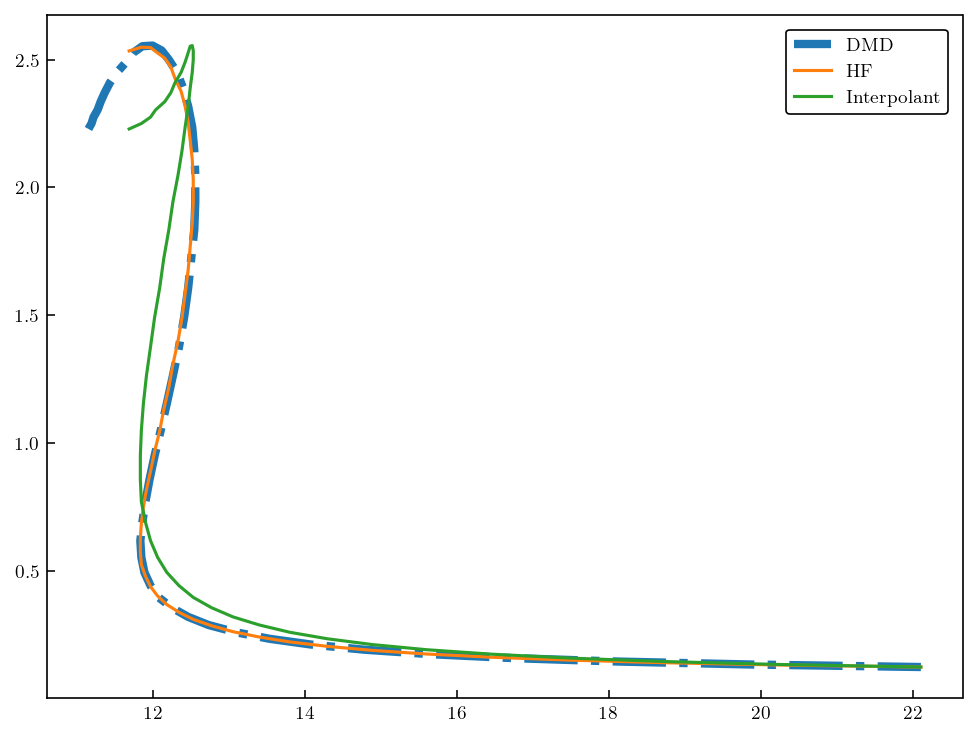

2.5552977507133354 2.5552977507133354


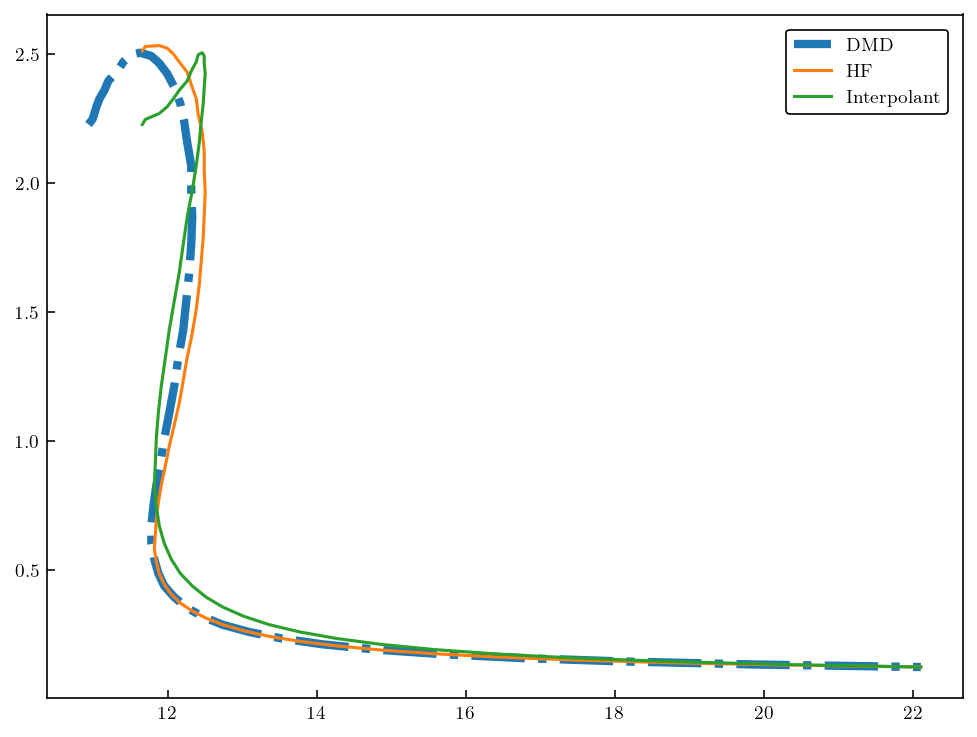

2.505610759515832 2.505610759515832


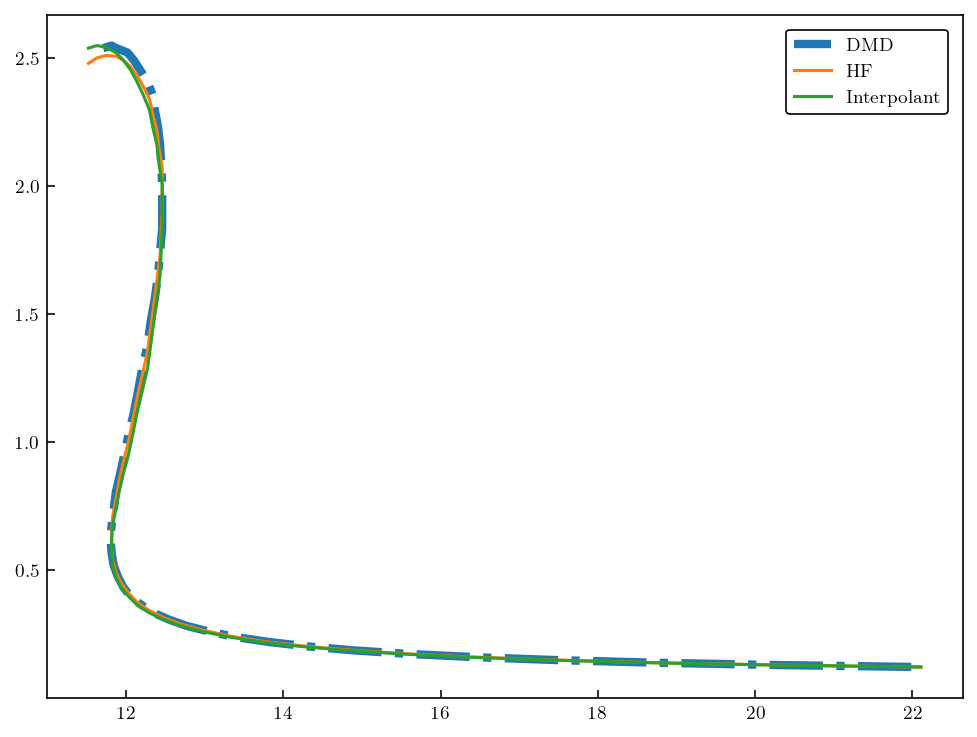

2.5495583330177753 2.5495583330177753


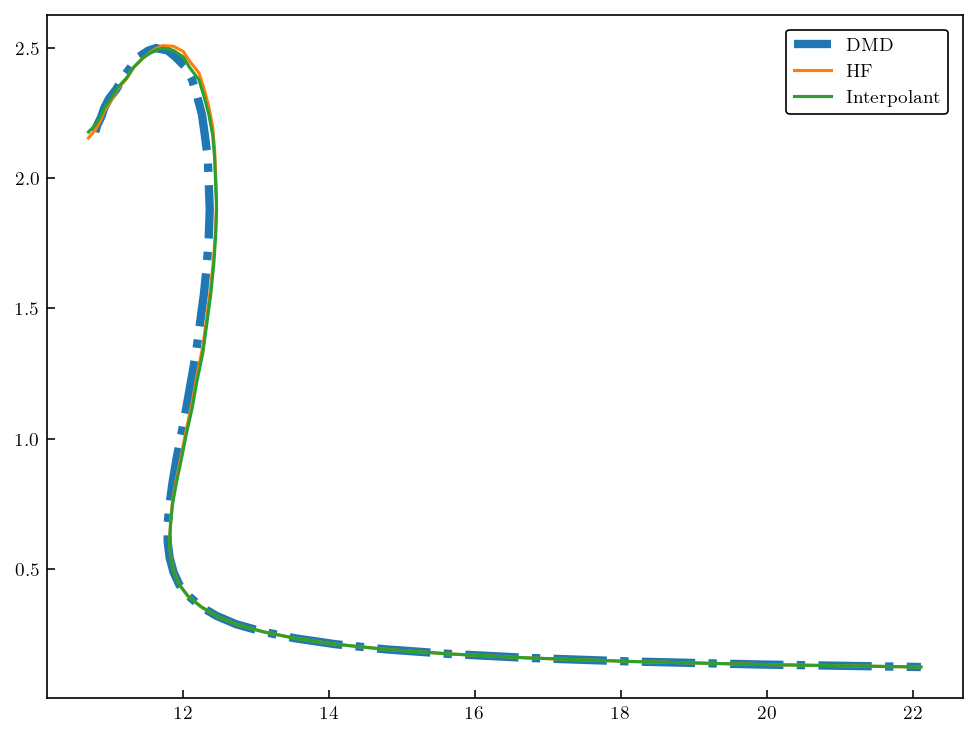

2.500121593064892 2.500121593064892


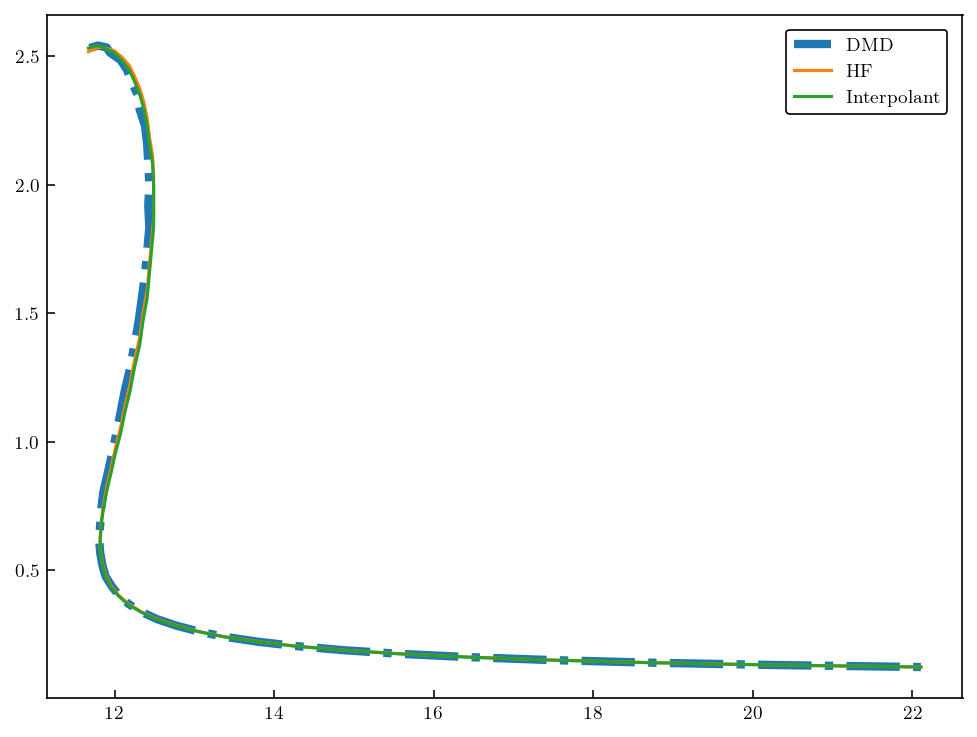

2.542422324378612 2.542422324378612


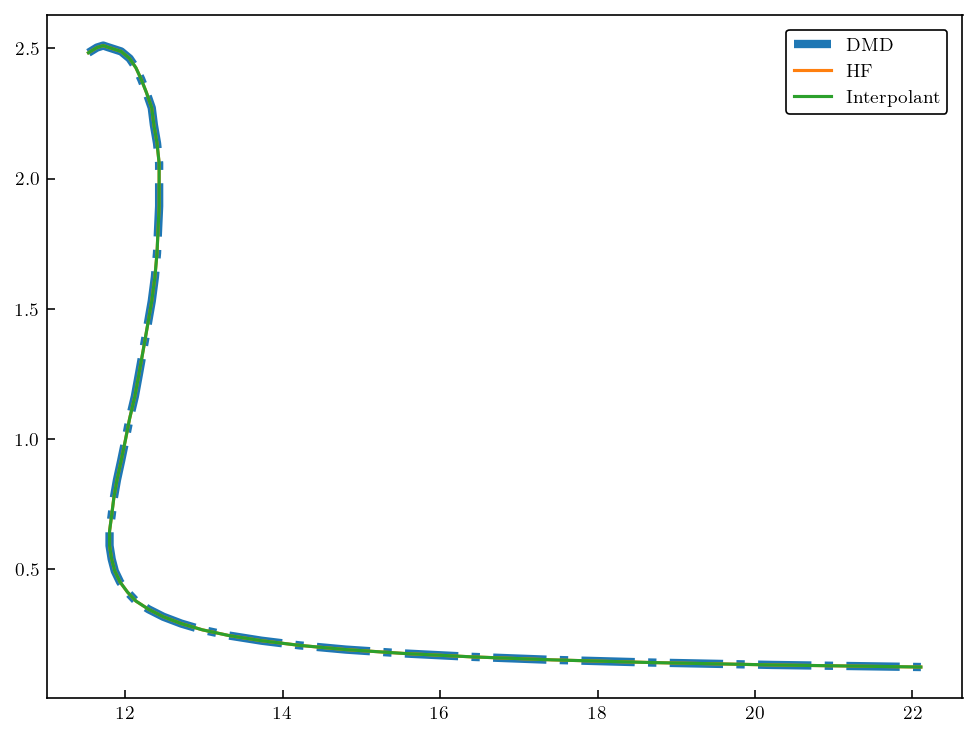

2.5108488002485236 2.5108488002485236


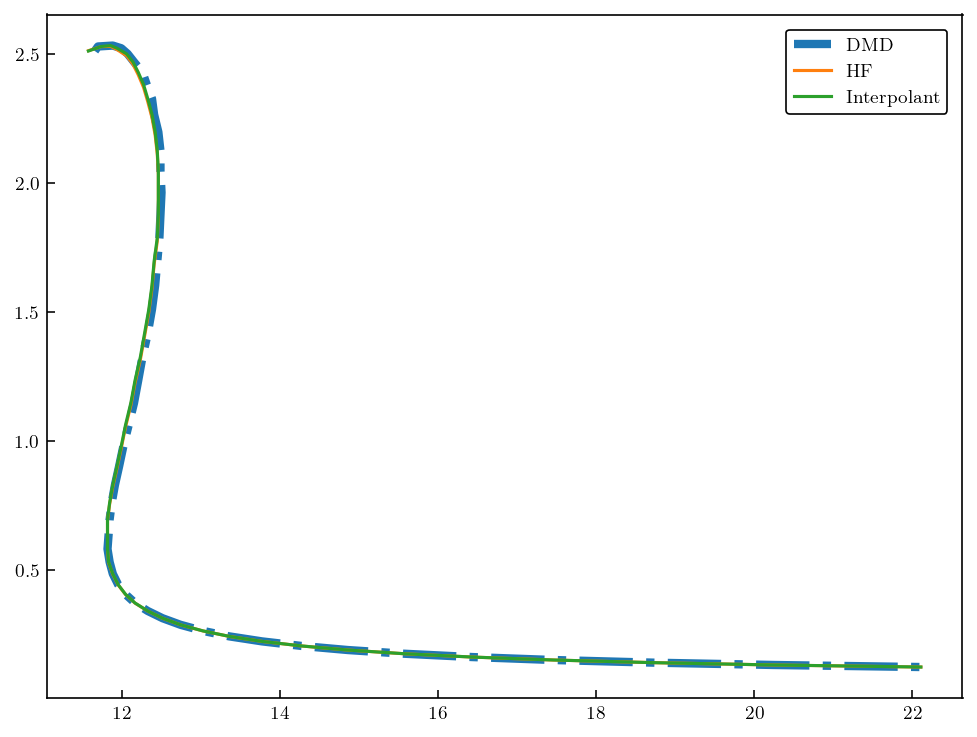

2.5334012421658403 2.5334012421658403


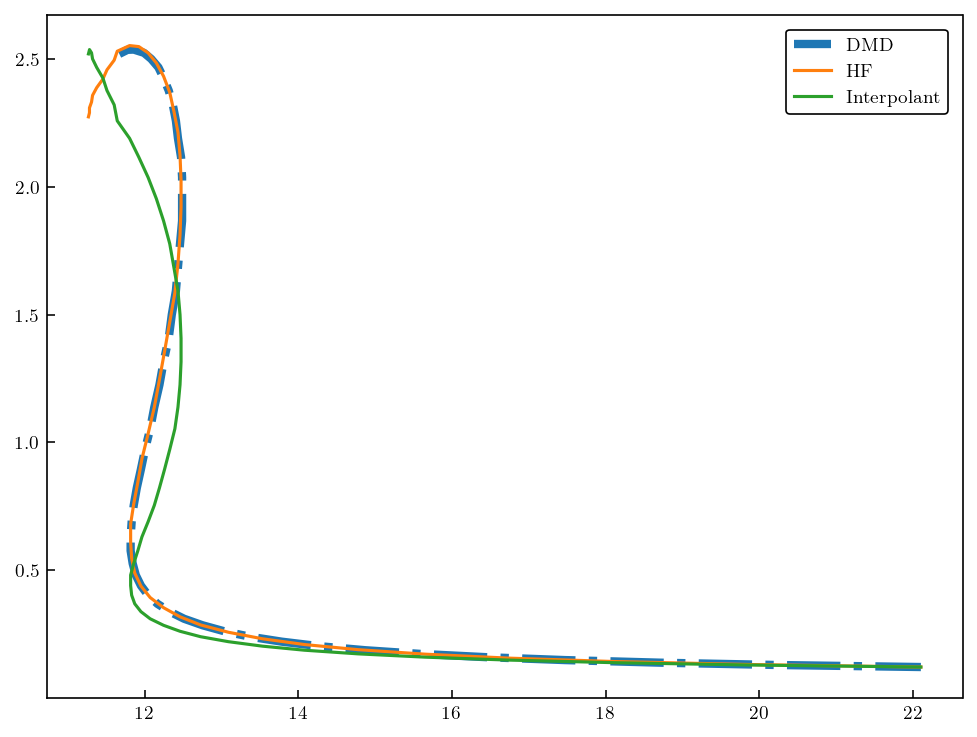

2.535385310890404 2.535385310890404


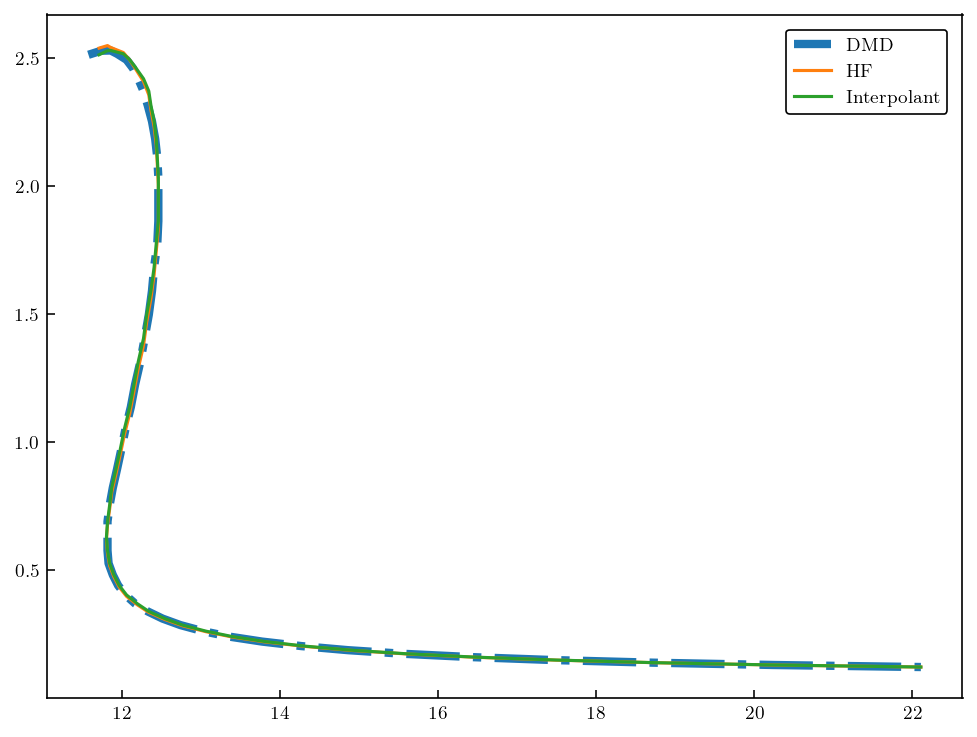

2.530311394383146 2.530311394383146


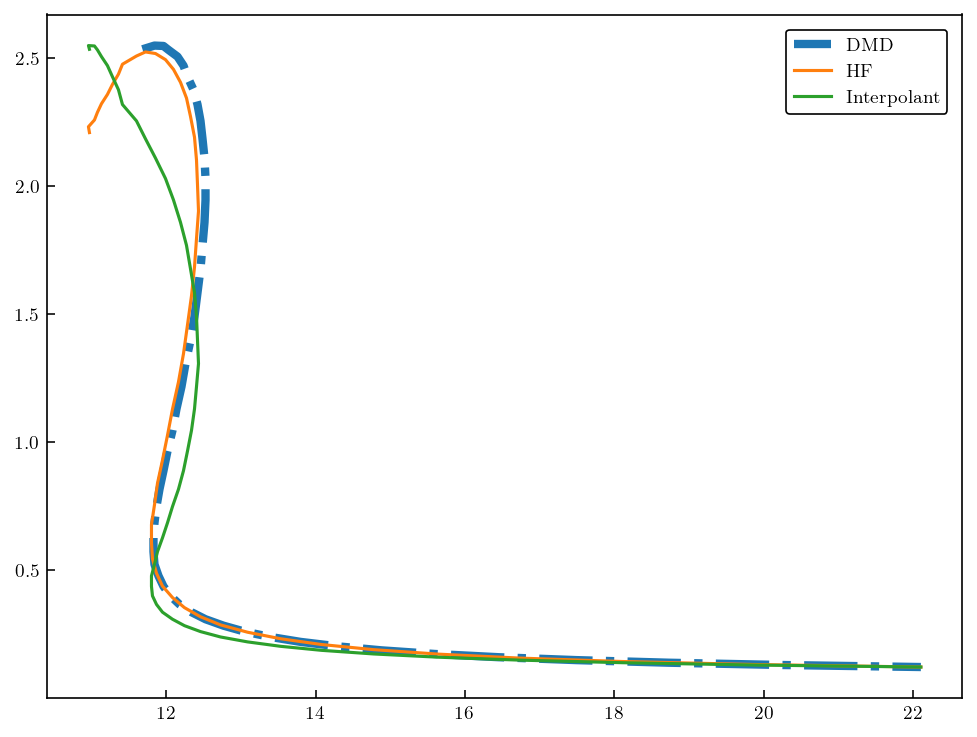

2.548974719832578 2.548974719832578


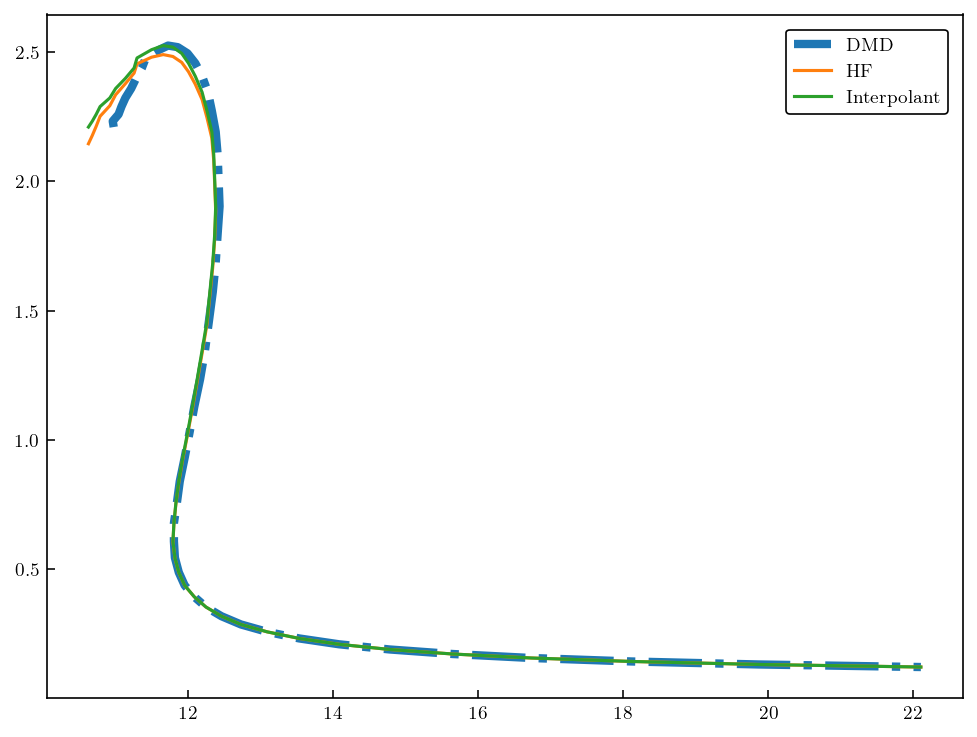

2.524083543235152 2.524083543235152


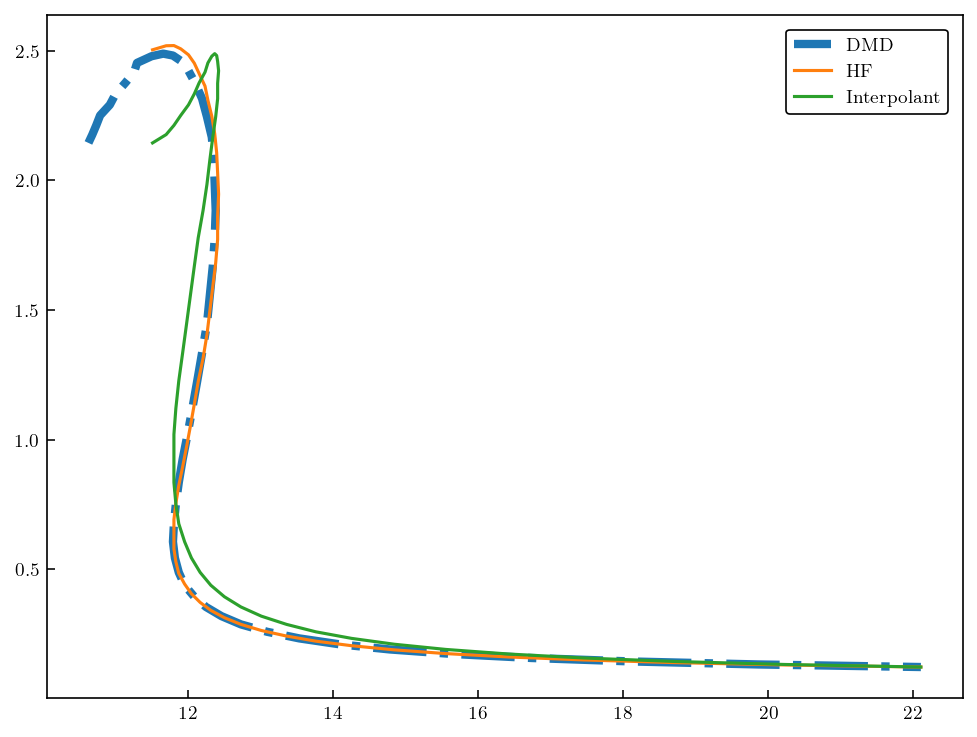

2.4892031506617744 2.4892031506617744


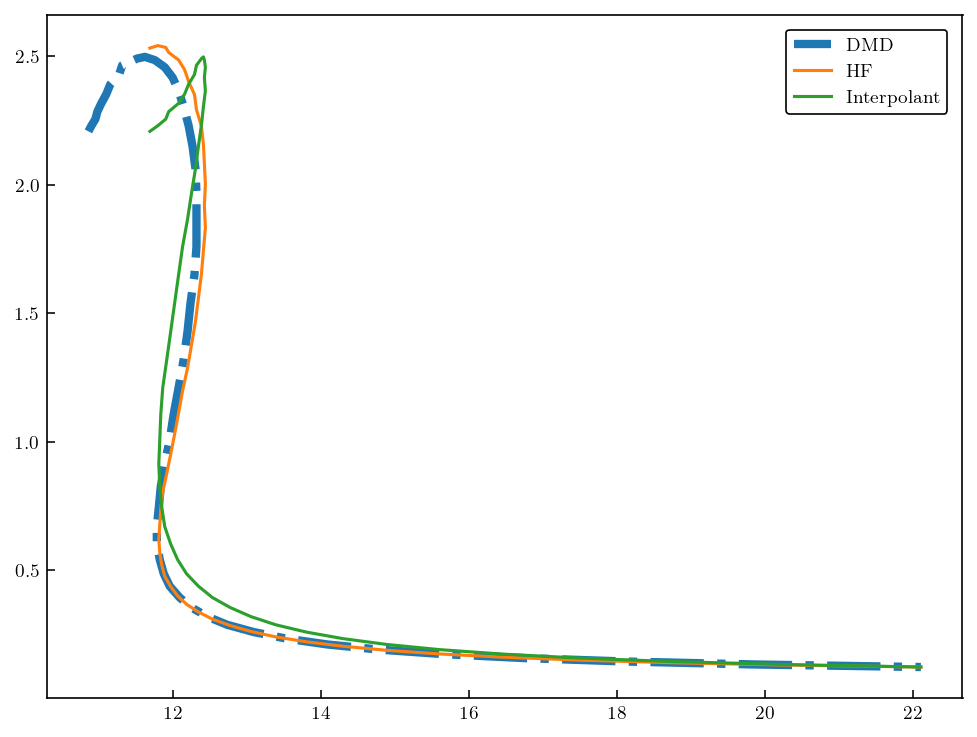

2.4984179562813833 2.4984179562813833


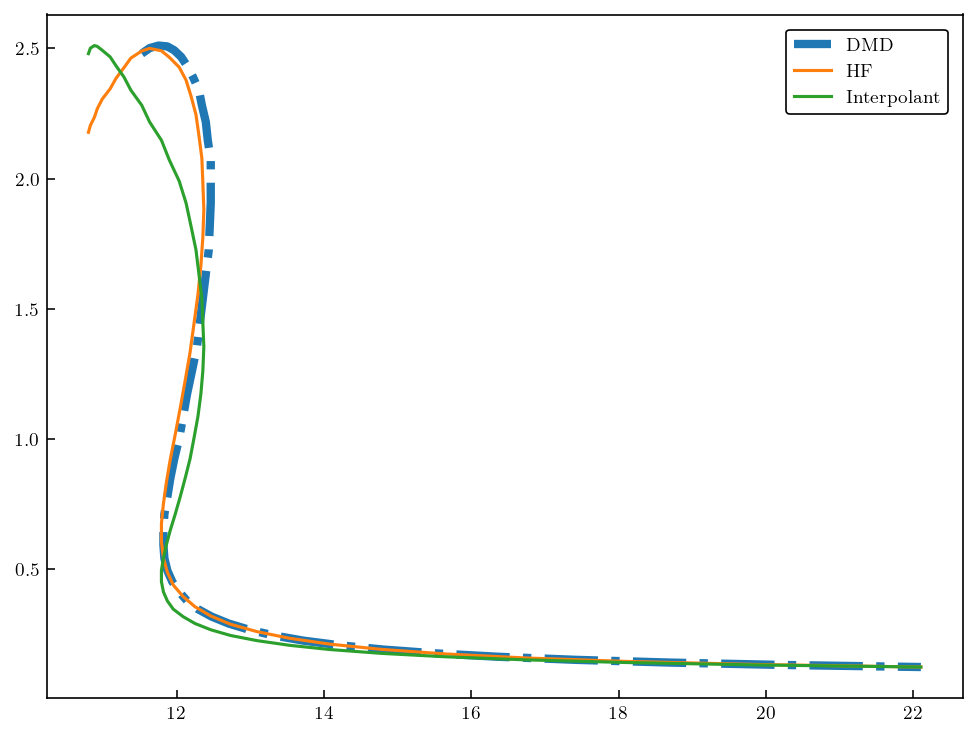

2.5110613027532027 2.5110613027532027


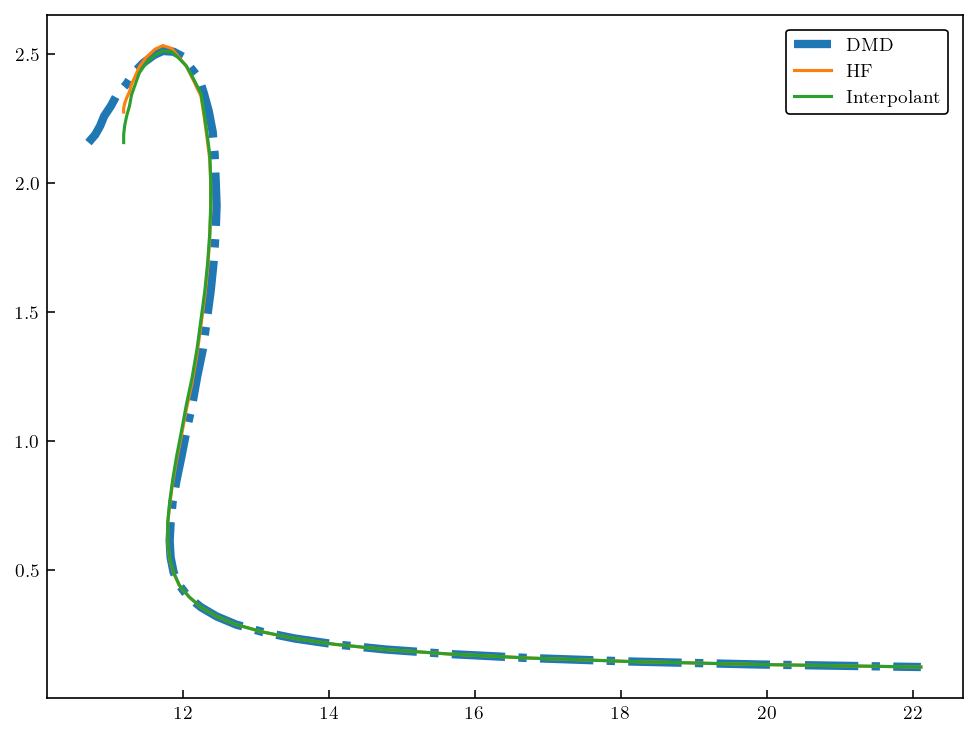

2.509831592284939 2.509831592284939


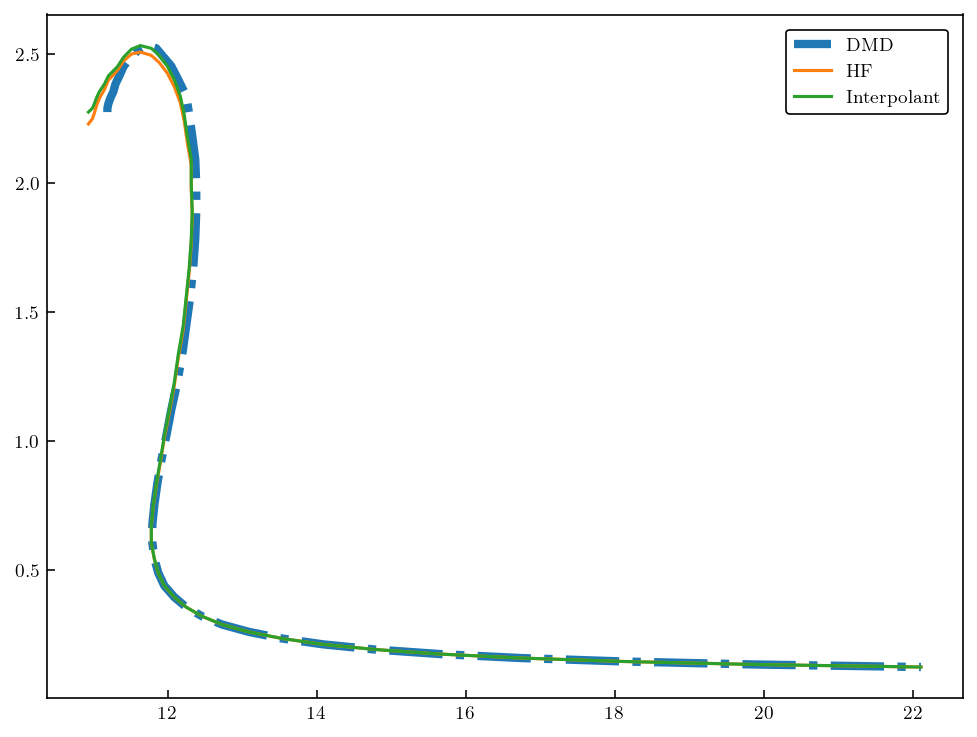

2.530785371336257 2.530785371336257


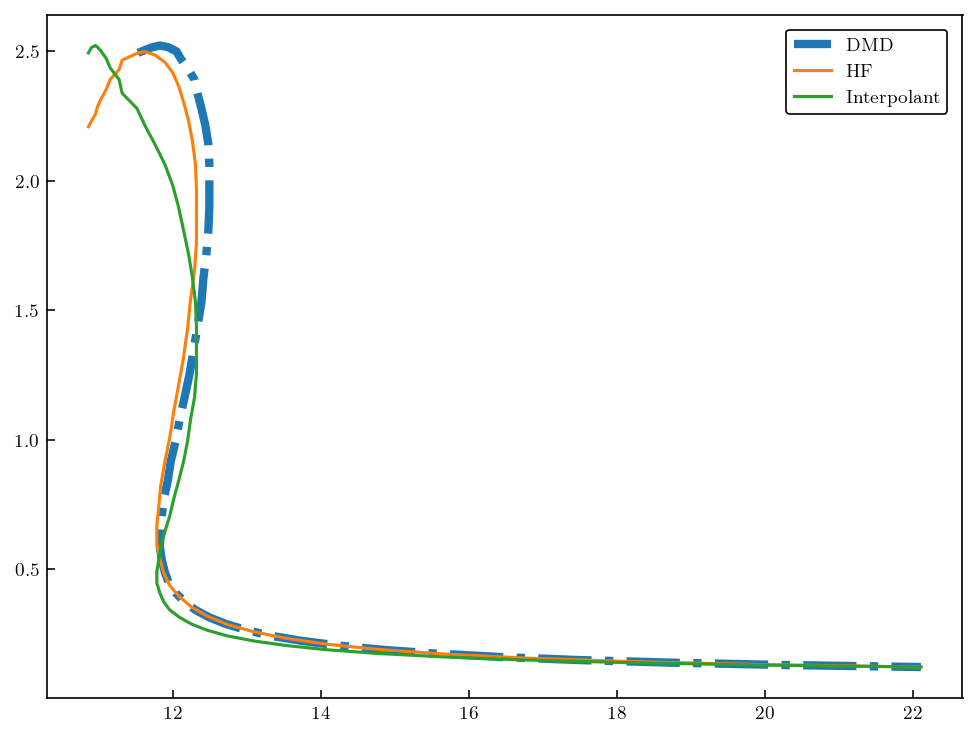

2.5218070927364393 2.5218070927364393


In [41]:
# pull in results from running the HF solver for quarkyonic eos model
import json

# DMD time array
with open('../testData/dmd_time_data.json', 'r') as file:
    dmd_time= json.load(file)

# dmd time into an array
dmd_time_array = np.asarray(list(dmd_time.values()))

hf_time_dict = {}
hf_MR_dict = {}
dmd_interp_mass = np.zeros([len(dmd_array), len(dmd_array[:,2,:].T)])

# also load in the HF files
for key in dmd_time.keys():
    hf_MR_dict[key] = np.loadtxt('../TOV_data/' + key)
    
    # remove the leading key letters
    new_key = key[3:]

    with open('../Results/DMD_' + new_key, 'r') as file:
        dmd_info = json.load(file)
        hf_time_dict[key] = dmd_info["hftime"]

# convert HF results into an array
hf_MR_array = np.asarray(list(hf_MR_dict.values()))  # (20, 50, 3)
    
for i in range(len(dmd_array)):
    dmd_interp_mass[i,:] = the_good_interpolator(dmd_array[i,0,:], dmd_array[i,2,:], hf_MR_array[i,:,0])[1]

    #dmd_interp_mass[key] = the_good_interpolator(dmd_dict[key][0][::-1], dmd_dict[key][2], hf_MR_dict[key][:,0])[1]

    # dmd_interp_mass[key] = mr_interp(hf_MR_dict[key][:,0])

    plt.plot(dmd_array[i,0,:], dmd_array[i,2,:], linestyle='-.', linewidth= 4,label='DMD')
    plt.plot(hf_MR_array[i,:,0], hf_MR_array[i,:,2], label=r'HF')
    plt.plot(hf_MR_array[i,:,0], dmd_interp_mass[i,:], label=r'Interpolant')
    plt.legend()
    plt.show()

# indices_run = []
# find the max values and save indices
# for i in range(len(dmd_array)):
    
    max_dmds = np.max(dmd_array[i,2,:])
    indices = np.argmax(dmd_array[i,2,:])

    print(max_dmds, dmd_interp_mass[i, indices])

    # rough comparison but will do the job for now
    if np.abs(max_dmds - dmd_interp_mass[i, indices]) >= 0.2:
        indices_run.append(i)

# print(indices_run)
    
# cut the indices we do not want to keep (by eye, no other way right now)
dmd_interp_mass = np.delete(dmd_interp_mass, [3, 4, 10, 12, 14, 15, 16, 19], axis=0)
hf_MR_array = np.delete(hf_MR_array, [3, 4, 10, 12, 14, 15, 16, 19], axis=0)
dmd_array = np.delete(dmd_array, [3, 4, 10, 12, 14, 15, 16, 19], axis=0)

# use the maximum masses and radii and compare the two?
rel_error = np.zeros([len(dmd_array), len(dmd_array[:,2,:].T)])   # (20, 50)

for i in range(len(dmd_array)):
    # get the relative error of each array
    rel_error[i,:] = (np.abs(-dmd_interp_mass[i,:] + hf_MR_array[i,:,2])/ hf_MR_array[i,:,2])*100

# max relative error 
rel_error_norm = np.zeros(len(rel_error))

for i in range(len(rel_error)):
    rel_error_norm[i] = max(rel_error[i,:]) 

In [47]:
print(rel_error_norm)

[2.80266289 2.30159704 4.8967936  5.04590558 1.81045827 2.20295225
 0.         0.79782813 2.18704764 3.0063587  5.19864941 2.0535333 ]


In [42]:
# also cut the time array
dmd_time_array = np.delete(dmd_time_array, [3, 4, 10, 12, 14, 15, 16, 19])

In [43]:
# average all of the runs that we kept for the HF time array
hf_time_array = np.asarray(list(hf_time_dict.values()))
hf_time_array = np.delete(hf_time_array, [3, 4, 10, 12, 14, 15, 16, 19])

In [44]:
# average these
lower_hf_time = np.min(hf_time_array)
upper_hf_time = np.max(hf_time_array)

/var/folders/q4/wyq6nf1d29n2gxrsbvs1m01r0000gn/T/ipykernel_52778/1858943072.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0.0, 100.0)


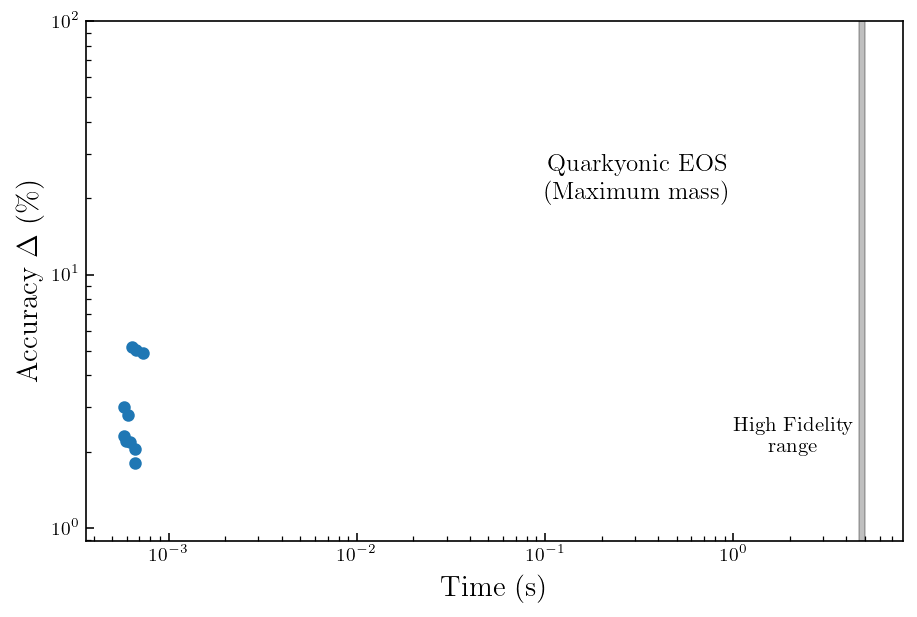

In [45]:
# build simple CAT plot
fig = plt.figure(figsize=(6,4), dpi=150)
ax = plt.axes()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'Time (s)', fontsize=14)
ax.set_ylabel(r'Accuracy $\Delta$ (\%)', fontsize=14)
ax.set_ylim(0.0, 100.0)

# CAT results for Sly4 compared to 1e-14 result (comparing max mass here)
ax.plot(dmd_time_array, rel_error_norm, '.', markersize=10)
ax.axvspan(lower_hf_time, upper_hf_time, color='black', alpha=0.25)
label2 = r'''High Fidelity
range'''
ax.text(1.0, 2.0, label2, multialignment='center', fontsize=10)
label = r"""Quarkyonic EOS
(Maximum mass)"""
ax.text(0.1, 20.0, label, multialignment='center', fontsize=12)
#ax.legend(loc='upper right', fontsize=12)
#plt.savefig('CAT_plot_preliminary_Sly4.pdf')
plt.show()